In [63]:
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
import requests
import numpy as np

Retrieve HTML document

In [64]:
query = 'rtx+2080+ti'
url = 'https://www.google.com/search?nord=1&tbm=shop&sxsrf=ALeKk021SiG0jK8P5QFwMwEqTTzTaLSJzw%3A1592931029540&source=hp&ei=1TLyXsOJHpqj5OUPhpau4A0&q='+query+'&oq='+query+'&gs_lcp=Cgtwcm9kdWN0cy1jYxADMgQIIxAnMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIIxDqAhAnUNcxWKk3YLY9aAFwAHgAgAFyiAHhBpIBAzAuOJgBAKABAaoBD3Byb2R1Y3RzLWNjLXdperABCg&sclient=products-cc&ved=0ahUKEwiDyKjBspjqAhWaEbkGHQaLC9wQ4dUDCAc&uact=5' 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Cookie': 'CGIC=Ikp0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLCovKjtxPTAuOA; NID=204=g5k0DQlZKLTdLr2eD81V0cBic7FoycSof8bAgCMupaGwWO-cn-aDp4NUCNcHkvob_dhAbeN494eviqwrSCfwhQDQq_d-K4HTG-YNx2lF8KG8VIk6Yo2a7c3Pw5HotilTZgFSU8VD0uKVW8AV690h73WIiDIcfNVwDYelsvHet_n3khOjpi6XfQl0CObNAEM_f8Hm7OwWc6un1hNiaTSC2W__Y9roxCVOUOpPGvAiQgoBNL2k5G_H51ZyUiTKZRsH4QUu-MOLeMLsUtr5jwUVhZbGX4xfCzos-5uBgg; SID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8XkHxgCwnV5Fzza3RX_3U_Q.; HSID=AmrflQdOkBZnypTpP; SSID=AnGRjrMyz8shzmiN-; APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; SAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; ANID=AHWqTUmOvuytiAZ-RiEMDbSXk1liOmiVXsC3K6j8wTAEsxXncb8Naetqd35RHH5u; SIDCC=AJi4QfH7YFZXPoNzhwKuKu3wXev3h6HvD9qbfqDB0-6PoOq2RkwFgUHu3oxgm8LCqqtm7aWDH_-J; SEARCH_SAMESITE=CgQI_48B; __Secure-3PSID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8DoN4DUANadKjm3gWjbWkKQ.; __Secure-3PAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; __Secure-HSID=AmrflQdOkBZnypTpP; __Secure-SSID=AnGRjrMyz8shzmiN-; __Secure-APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; 1P_JAR=2020-06-23-16; OTZ=5502067_68_64_73560_68_416340; DV=k7tykpHOCQdJUOnslcXBzjs-r2ohLheAAP7r7W9LEAYAANDMM2lHtAn8AAIAAJSWJz2C-gppkwAAAA',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'}
#payload = ''
#response = requests.post(url, data=payload, headers=headers)
response = requests.get(url, headers=headers)

Instantiate DOM tree and extractor

In [65]:
#doc = wm.DOM('test.html', '')
doc = wm.DOM(url, response.text)
dsre = wm.DSRE()

Extract

In [66]:
#dsre.setUseFourier(False)
dsre.extract(doc)

Retrieve the number of extracted regions

In [67]:
rcount = dsre.regionCount()

Iterate over the extracted regions, building a table (a matrix with dimensions recordCount x recordSize) with the extraction results of each region

In [68]:
content = []
regions = []
tps = []
transforms = []
for reg in range(0, rcount):
    dr = dsre.getDataRegion(reg)
    content.append(dr.isContent())
    tps.append(dr.getSequence())
    transforms.append(dr.getTransform())
    rows = dr.recordCount()
    cols = dr.recordSize()
    records = []
    for r in range(0, rows):
        record = []
        for c in range(0, cols):
            cell = dr.getCell(r,c)
            if (cell != None):
                record.append(cell.toString())
        records.append(record)
    regions.append(records)

Displays a table with the results of each region

In [69]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[content[i]] + ', ' + str(len(region)) + ' records')
    display(tabulate(region, tablefmt='html'))

'Region #0 - content, 20 records'

"Placa de Vídeo Gaming Box Aorus NVIDIA GeForce RXT 2080 Ti, 11GB, GDDR6 - GV-N208TIXEB-11GC","R$ 10.779,90.","R$ 10.779,90",KaBuM!,Powered by GIGABYTE Geforce,"graphics card, AORUS",Gaming Box transfers the Ultrabook laptop PC into a ...,·,Setembro de 2018,ASUS,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17772422326010779112_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),1.408 comentários sobre o produto,·,·,·,·,·,·,·,·,RTX 2080 Ti,RTX 2080 Ti,PCI Express,DisplayPort,DVI,HDMI,GDDR,11 GB,Placa gráfica,
"Placa de Vídeo PNY NVIDIA GeForce RTX 2080 Ti Blower, 11GB, GDDR6 - VCG2080T11BLPPB","R$ 7.934,90.","R$ 7.934,90",KaBuM!,·,·,·,·,Setembro de 2018,ASUS,ASUS,"<img class=TL92Hc c16 data-deferred=1 id=srpresultimg_2661393170450619778_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),1.408 comentários sobre o produto,·,·,·,·,·,PCI Express,DisplayPort,DVI,HDMI,GDDR,11 GB,Placa gráfica,,,,,,
"Placa de Vídeo Aorus NVIDIA GeForce RTX 2080 Super Waterforce, 8GB, GDDR6 - GV-N208SAORUS W-8GC","R$ 5.848,90.","R$ 5.848,90",KaBuM!,AORUS provides the all-around cooling solution for all key components of the graphics card. GIGABYTE takes care not only GPU ...,·,·,·,Julho de 2019,GIGABYTE,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17047332292187175672_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),1.070 comentários sobre o produto,·,·,·,·,·,·,4096 x 2160,PCI Express,DisplayPort,HDMI,GDDR,8 GB,Placa gráfica,,,,,
"Placa de Vídeo Gigabyte Aorus NVIDIA GeForce RTX 2080 Ti Xtreme 11G, GDDR6 - GV-N208TAORUS X-11GC","R$ 8.999,90.","R$ 8.999,90",KaBuM!,AORUS fornece a solução de refrigeração completa para todos os principais componentes da placa gráfica.,·,·,·,Setembro de 2018,GIGABYTE,GIGABYTE,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_14860149008765637242_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),899 comentários sobre o produto,·,·,·,·,·,·,PCI Express,DisplayPort,VGA,HDMI,GDDR,11 GB,Placa gráfica,,,,,
"Placa de Vídeo EVGA NVIDIA GeForce RTX 2080 TI FTW3 Ultra Overclocked 65C Gaming, 11GB, GDDR6 - 11G-P4-2487-KR","R$ 9.799,90.","R$ 9.799,90",KaBuM!,As placas gráficas EVGA GeForce,da série 20 são equipadas com a nova arquitetura NVIDIA Turing para oferecer novos níveis ...,·,·,Setembro de 2018,ASUS,ASUS,93%,positivos,(395),1.408 comentários sobre o produto,·,·,·,·,·,·,·,RTX,PCI Express,DisplayPort,DVI,HDMI,GDDR,11 GB,Placa gráfica,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_1017311173285275412_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,
Placa de Vídeo Gainward GeForce RTX 2080ti 11GB GDDR6 Phoenix - NE6208TT20LC-150X,"R$ 5.982,30.","R$ 5.982,30",FGTEC,A GeForce,é equipada com tecnologia da premiada arquitetura NVIDIA Turing e tem uma GPU super-rápida com mais ...,·,·,Setembro de 2018,ASUS,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_16118494066147774274_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",1.408 comentários sobre o produto,·,·,·,·,·,·,·,RTX 2080 Ti,DisplayPort,DVI,VGA,HDMI,GDDR,11 GB,Placa gráfica,,,,,,
"Placa de Vídeo Colorful iGame NVIDIA GeForce RTX 2080 Ti Advanced OC, 11GB, GDDR6 - iGame GeForce RTX 2080 Ti Advanced OC","R$ 8.699,90.","R$ 8.699,90",KaBuM!,Placa de Vídeo Colorful iGame Geforce,"Advanced OC, 11GB GDDR6, 352Bit, A melhor e mais atual placa de vídeo da ...",·,·,Colorful,11 GB,GDDR,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_4428976572238604183_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),RTX 2080 Ti,,,,,,,,,,,,,,,,,,
"Placa de Vídeo Gigabyte Aorus NVIDIA GeForce RTX 2080 Ti Xtreme Waterforce WB 11G, GDDR6 - GV-N208TAORUS

'Region #1 - noise, 9 records'

Categoria,Computadores desktop para games,Computadores desktop de torre,Placas de vídeo,,,,
Memória de vídeo,24 – 48 GB,16 – 24 GB,11 – 16 GB,6 – 11 GB,,,
Processador gráfico,GALAX,NVIDIA,EVGA,MSI,GIGABYTE,Colorful,ASUS
Fabricante,PNY,MSI,EVGA,ASUS,GIGABYTE,,
Tipo de memória,DDR,GDDR,GDDR5,,,,
Saída,VGA,DVI,DisplayPort,HDMI,,,
Comprimento,acima de 286 mm,195 – 286 mm,133 – 195 mm,90 – 133 mm,até 90 mm,,
Condição,Itens usados,Itens novos,,,,,
Vendedor,,,,,,,


'Region #2 - noise, 9 records'

"<img alt=HDMI data-deferred=1 id=vrefimg_0_0_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",HDMI,
"<img alt=DisplayPort data-deferred=1 id=vrefimg_0_1_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",DisplayPort,
"<img alt=DVI data-deferred=1 id=vrefimg_0_2_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",DVI,
"<img alt=VGA data-deferred=1 id=vrefimg_0_3_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",VGA,Filtrar por Fabricante
"<img alt=GIGABYTE data-deferred=1 id=vrefimg_1_0_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",GIGABYTE,
"<img alt=ASUS data-deferred=1 id=vrefimg_1_1_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",ASUS,
"<img alt=EVGA data-deferred=1 id=vrefimg_1_2_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",EVGA,
"<img alt=MSI data-deferred=1 id=vrefimg_1_3_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",MSI,
"<img alt=PNY data-deferred=1 id=vrefimg_1_4_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",PNY,


Plot the sequence of the document and the subsequence of each region

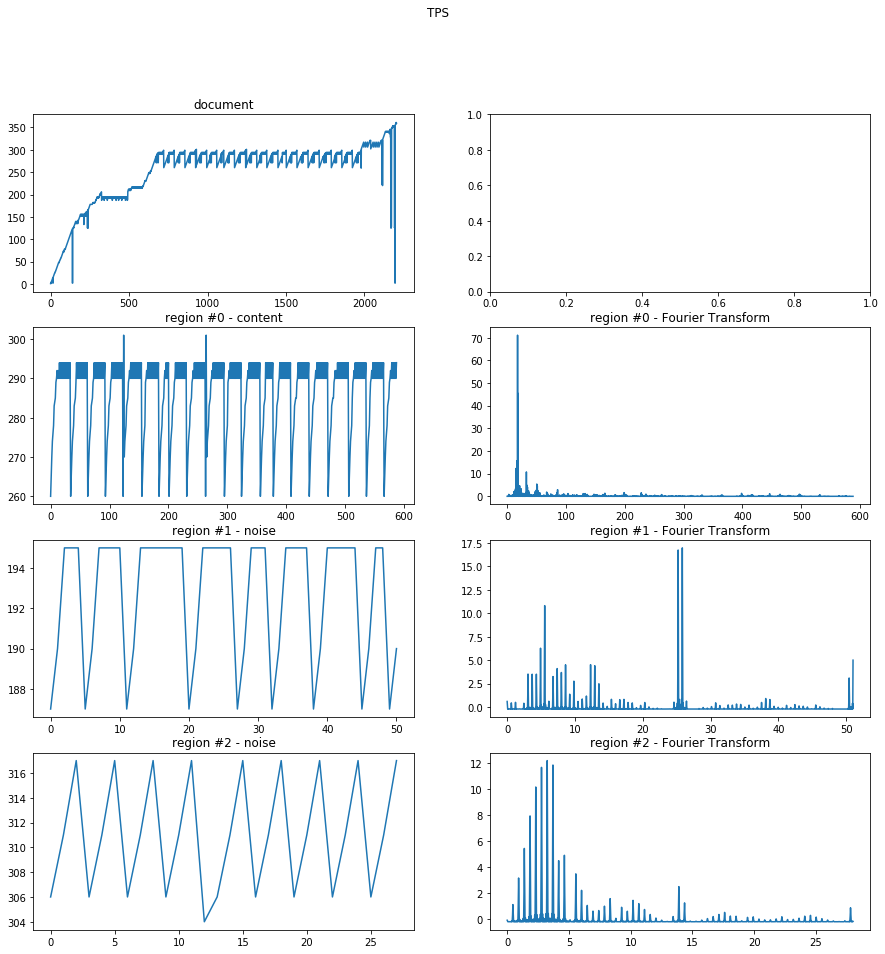

In [72]:
fig, axis = plt.subplots(len(regions)+1, 2, figsize=(15,15))
fig.suptitle('TPS')
axis[0, 0].plot(dsre.getSequence())
axis[0, 0].set_title('document')
for i in range(0, len(regions)):
    axis[i+1, 0].set_title('region #' + str(i) + ' - ' + content_string[content[i]])
    axis[i+1, 0].plot(tps[i])
    axis[i+1, 1].set_title('region #' + str(i) + ' - Fourier Transform')
    axis[i+1, 1].plot(
        np.linspace(0, len(tps[i]), len(transforms[i])//2), 
        transforms[i][0:len(transforms[i])//2])